In [8]:
"""importing libraries"""
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


In [10]:
"""printing first 5 rows"""
df_test = pd.read_csv(r"C:\Users\dibak\Desktop\test.csv")
df_train=pd.read_csv(r"C:\Users\dibak\Desktop\train.csv")
display(df_train.head())
display(df_test.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
"""checking null"""
pd.DataFrame(data = [df_train.isna().sum()/df_train.shape[0]*100, df_test.isna().sum()/df_test.shape[0]*100], index=["Train Null (%)", "Test Null (%)"]).T.style.background_gradient(cmap='summer_r')

,Train Null (%),Test Null (%)
PassengerId,0.000000,0.000000
Survived,0.000000,nan
Pclass,0.000000,0.000000
Name,0.000000,0.000000
Sex,0.000000,0.000000
Age,19.865320,20.574163
SibSp,0.000000,0.000000
Parch,0.000000,0.000000
Ticket,0.000000,0.000000
Fare,0.000000,0.239234


***Cheking for duplicate data***

In [11]:
print(f"Train data has {df_train.duplicated().sum()} duplicated data")
print(f"Test data has {df_test.duplicated().sum()} duplicated data")

Train data has 0 duplicated data
Test data has 0 duplicated data


***checking info***

In [13]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


***Looks like we have 12 variables, and each variable has 891 records.***

**EDA**

In [15]:
num_var = ["SibSp", "Parch", "Age", "Fare"]
cat_var = ["Sex", "Embarked", "Pclass"]
target = "Survived"

In [16]:
def num_dist(data, var):
    fig, ax = plt.subplots(1, 2, figsize=(12, 4))

    sns.histplot(data=data, x=var, kde=True, ax=ax[0])
    sns.boxplot(data=data, x=var, ax=ax[1])
    ax[0].set_title(f"{var} Distribution Histogram")
    ax[1].set_title(f"{var} Distribution Boxplot")

    plt.show()
    
def cat_dist(data, var):
    fig, ax = plt.subplots(1, 2, figsize=(12, 4))

    df_train[var].value_counts().plot(kind="pie", explode=[0.05 for x in data[var].dropna().unique()], autopct='%1.1f%%', ax=ax[0], shadow=True)
    ax[0].set_title(f"{var} Pie Chart")
    ax[0].set_ylabel('')

    count = sns.countplot(x=var, data=df_train, ax=ax[1])
    for bar in count.patches:
        count.annotate(format(bar.get_height()),
            (bar.get_x() + bar.get_width() / 2,
            bar.get_height()), ha='center', va='center',
            size=11, xytext=(0, 8),
            textcoords='offset points')
    ax[1].set_title(f"{var} Bar Chart")
    plt.show()

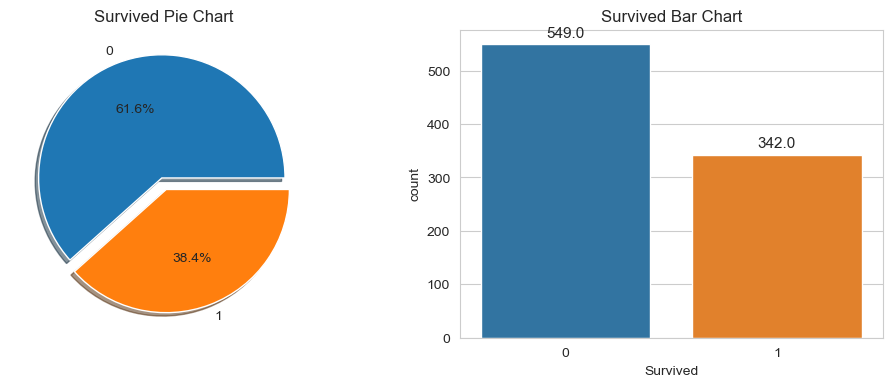

In [17]:
cat_dist(df_train, "Survived")

Unfortunately, 61,6% passengers did not survive the fatal accident. Only 342 passengers survived out of a total of 891 passengers in the training data. So, what caused them to survive the accident. 
We will try to analyze the features in this dataset that might be able to answer this question.

***CHECKING PREDICTOR DISTRIBUTION***

In [18]:
df_train[num_var].describe()

,SibSp,Parch,Age,Fare
count,891.000000,891.000000,714.000000,891.000000
mean,0.523008,0.381594,29.699118,32.204208
std,1.102743,0.806057,14.526497,49.693429
min,0.000000,0.000000,0.420000,0.000000
25%,0.000000,0.000000,20.125000,7.910400
50%,0.000000,0.000000,28.000000,14.454200
75%,1.000000,0.000000,38.000000,31.000000
max,8.000000,6.000000,80.000000,512.329200


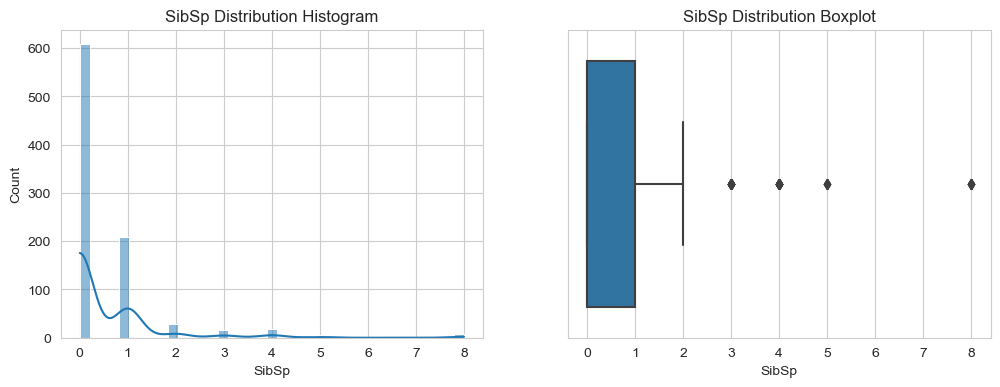

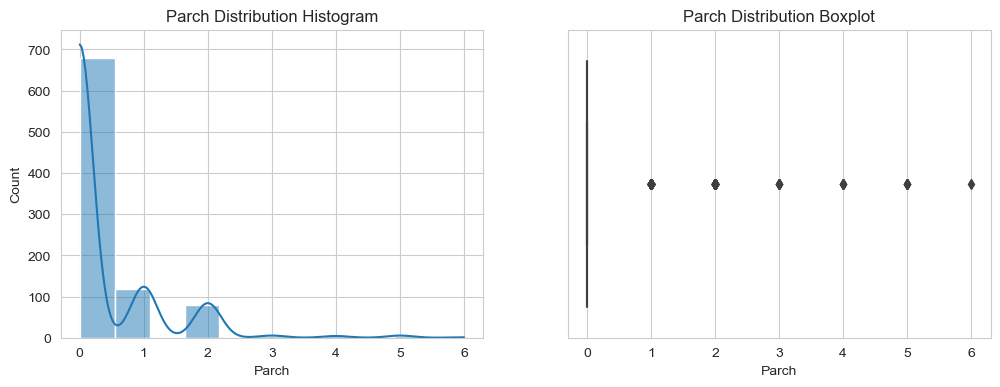

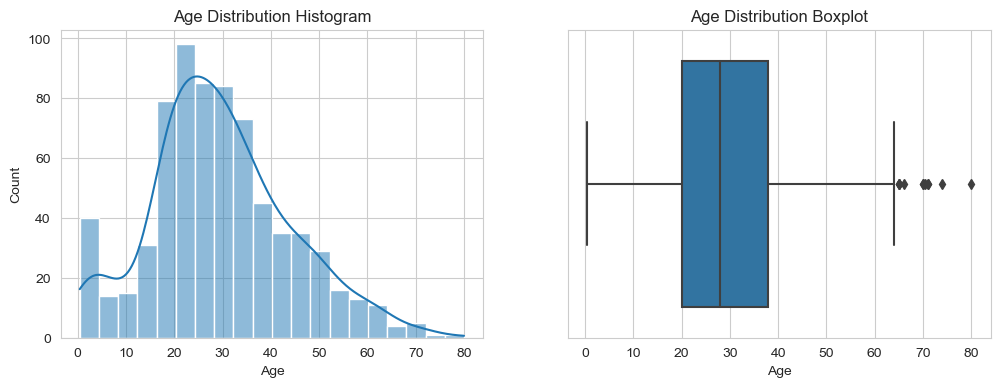

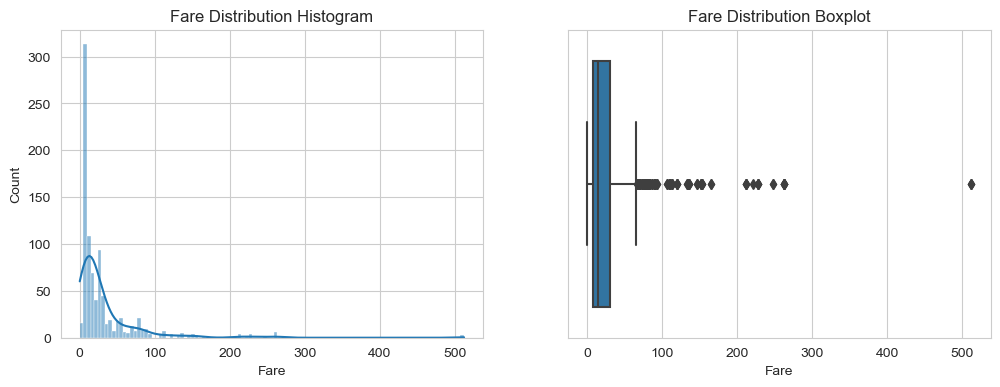

In [19]:
for var in num_var:
    num_dist(df_train, var)

Most passengers at that time traveled alone without their families. The age of the passengers also varies from 0.42 to 80 years, with an average of 29.7 years. Fares for these passengers also vary, but what's interesting here is that there are passengers who don't have to pay for this cruise.

As we can see, all of the above variables have outliers. Age variable seems to have almost a normal distribution, but there are some outliers that cause the distribution to be skewed to the right. Other variables appear to have a right skewed distribution because of that.

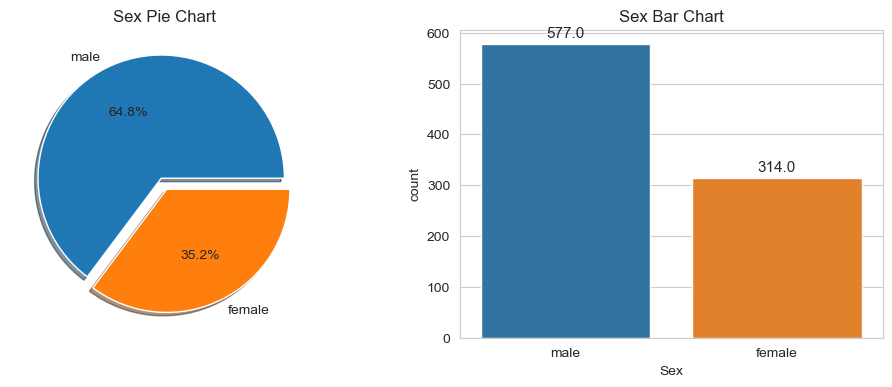

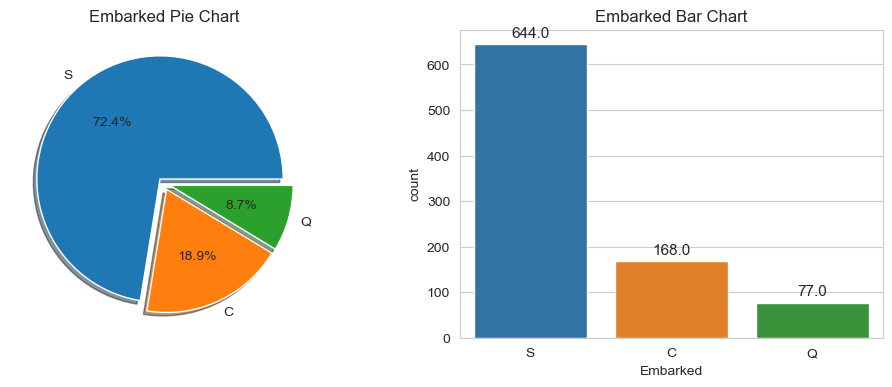

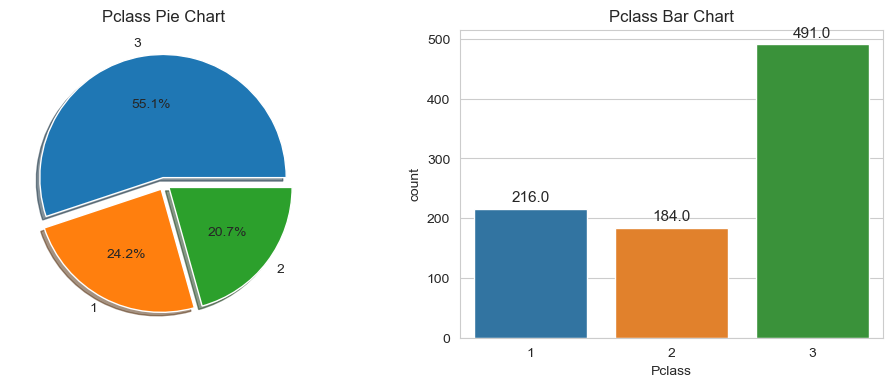

In [20]:
for var in cat_var:
    cat_dist(df_train, var)

64.8% of the passengers in this training set are male, while the remaining 35.2% are female. More than 70% of these passengers embarked from port S (Southampton). Very few passengers embarked from port Q (Queenstown), which is only 8.7%, while the rest embarked from port C (Cherbourg). Most of the passengers have 3rd ticket class, while the number of passengers who have 1st and 2nd ticket class is almost equal.

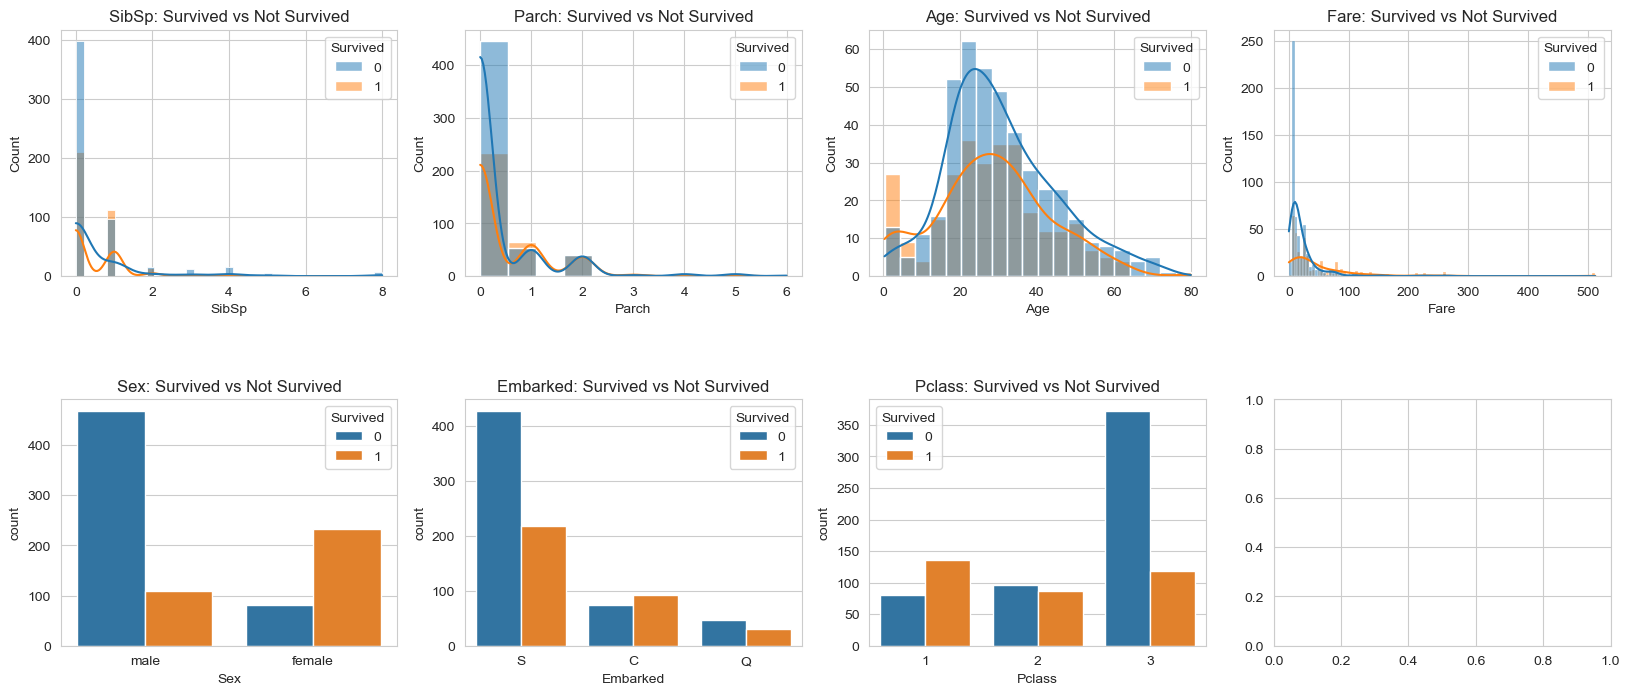

In [21]:
fig, ax = plt.subplots(2, 4, figsize=(20, 8))
ax = ax.flatten()

for i, var in enumerate(num_var+cat_var):
    if i < 4:
        sns.histplot(data=df_train, x=var, hue=target, kde=True, ax=ax[i])
    else:
        sns.countplot(data=df_train, x=var, hue=target, ax=ax[i])
    
    ax[i].set_title(f"{var}: Survived vs Not Survived")
    
plt.subplots_adjust(hspace=0.5)
plt.show()

Apparently, passengers who travel with small numbers of family have a greater survival chance. Also, large number of children (Age <= 10) survived in this tragedy, while passengers with the age above them tend not to survive. We can also see the number of female who survived was much more than male (women and children first code). Passengers embarked from port C seem to be luckier as many of them survived. Pclass also plays quite a role here because most of the passengers from Pclass 1 managed to survive or have more priority to be saved, while passengers with Pclass 3 tend not to survive.

Now, let's get deeper.

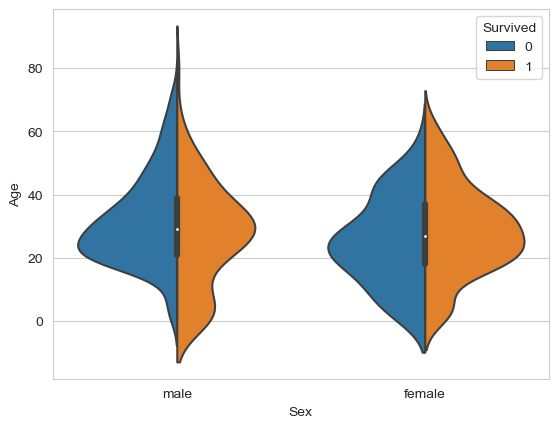

In [22]:
sns.violinplot(data=df_train, x="Sex", y="Age", hue="Survived", split=True)
plt.show()

Children survival rate for both gender seems to be good, even though the survival rate for boys is higher. For old people (Age > 60), the survival rate for old men tends to be lower, in contrast to the survival rate for old women which tends to be higher.

In [23]:
df_train["PassengerId"]

0        1
1        2
2        3
3        4
4        5
      ... 
886    887
887    888
888    889
889    890
890    891
Name: PassengerId, Length: 891, dtype: int64

In [24]:
df_train.drop("PassengerId", axis=1, inplace=True)
df_test.drop("PassengerId", axis=1, inplace=True)

In [25]:
df_train["Name"]

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [27]:
df_train["Title"] = df_train["Name"].str.extract('([A-Za-z]+)\.')
df_test["Title"] = df_test["Name"].str.extract('([A-Za-z]+)\.')

df_train["Title"].value_counts()

Title
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: count, dtype: int64

Some initials are owned by very few people, and some initials have the same meaning as others. We will group them according to the proper group.

In [30]:
def convert_title(title):
    if title in ["Ms", "Mile", "Miss"]:
        return "Miss"
    elif title in ["Mme", "Mrs"]:
        return "Mrs"
    elif title == "Mr":
        return "Mr"
    elif title == "Master":
        return "Master"
    else:
        return "Other"
        
df_train["Title"] = df_train["Title"].map(convert_title)
df_test["Title"] = df_test["Title"].map(convert_title)
df_train["Title"].value_counts()


Title
Mr        517
Miss      183
Mrs       126
Master     40
Other      25
Name: count, dtype: int64

In [31]:
df_train.drop("Name", axis=1, inplace=True)
df_test.drop("Name", axis=1, inplace=True)

In [32]:
display(df_train.head())
display(df_test.head())

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,1,1,female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,0,3,male,35.0,0,0,373450,8.0500,NaN,S,Mr


,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,3,male,34.5,0,0,330911,7.8292,NaN,Q,Mr
1,3,female,47.0,1,0,363272,7.0000,NaN,S,Mrs
2,2,male,62.0,0,0,240276,9.6875,NaN,Q,Mr
3,3,male,27.0,0,0,315154,8.6625,NaN,S,Mr
4,3,female,22.0,1,1,3101298,12.2875,NaN,S,Mrs
